c:\AIProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\AIProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\AIProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\AIProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\AIProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\AIProject\.venv\

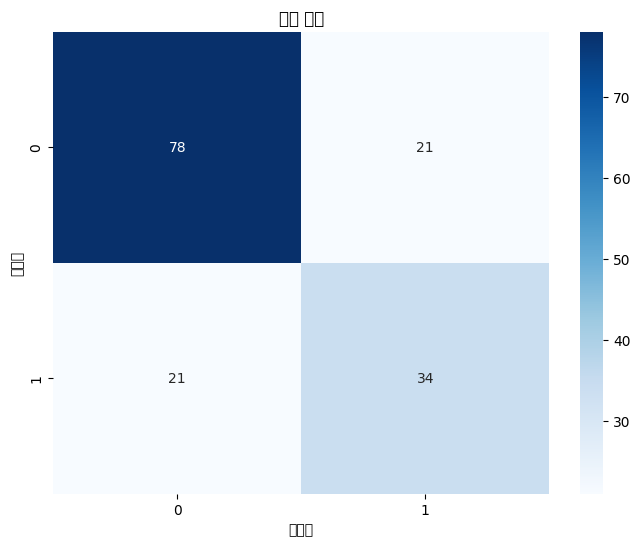


새로운 환자 데이터 예측 예시 : 
예측 결과 : 정상
당뇨병일 확룰 : 31.00%

예측 신뢰도 분포:


c:\AIProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\AIProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\AIProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\AIProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\AIProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\AIProject\.venv\li

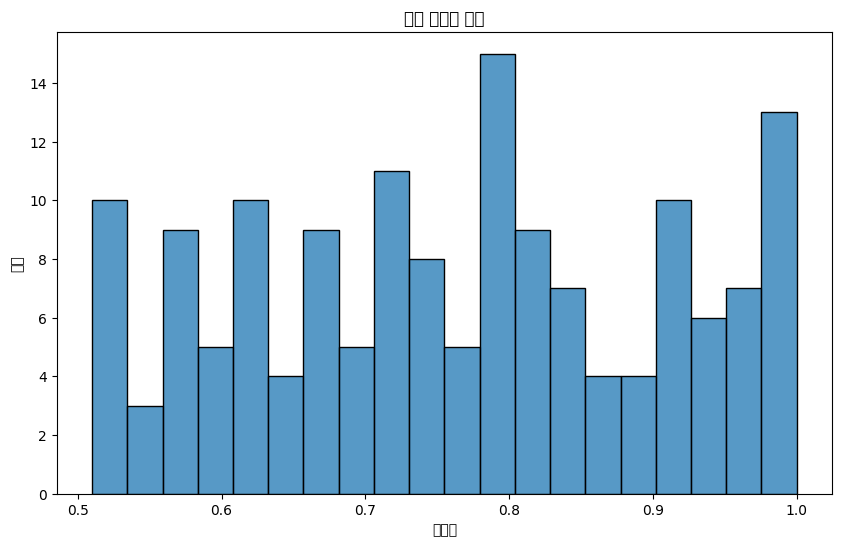

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 로드
data = pd.read_csv('./dataset/diabetes.csv')

# 특성(X)과 타겟(Y) 분리
X = data.drop('Outcome', axis=1)
Y = data['Outcome']
# print(data.head())  # 데이터 확인

# 데이터 전처리 : 특성 스케일링
scaler = StandardScaler()  # StandardScaler 임포트 확인
X_scaled = scaler.fit_transform(X)  # 스케일링 적용
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # DataFrame으로 변환

# X_scaled가 제대로 변환되었는지 확인
# print(X_scaled.head())

# 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

#랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 교차 검증 수행
cv_scores = cross_val_score(rf_model, X_scaled, Y, cv = 5)

# 특성 중요도 계산
feature_importance = pd.DataFrame({
    '특성' : X.columns,
    '중요도' : rf_model.feature_importances_
}).sort_values('중요도', ascending=False)

# 결과 출력
# print("모델 성능 평가")
# print("\n교차 검증 점수 : ")
# print(f"평균 정확도 : {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
# print("\n분류 리포트 : ")
# print(classification_report(Y_test, y_pred))

# # 특성 중요도 시각화
# plt.figure(figsize=(10, 6))
# sns.barplot(x='중요도', y='특성', data = feature_importance)
# plt.title('특성 중요도')
# plt.show()

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("혼동 행렬")
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()

# 새로운 환자 데이터로 예측 예시
print("\n새로운 환자 데이터 예측 예시 : ")
# 임의의 환자 데이터 생성
new_patient = X_test.iloc[0:1]
prediction = rf_model.predict(new_patient)
prediction_prob = rf_model.predict_proba(new_patient)

print(f"예측 결과 : {'당뇨병 환자' if prediction[0] == 1 else '정상'}")
print(f"당뇨병일 확룰 : {prediction_prob[0][1]:.2%}")

# 예측 신뢰도 분석
threshold_probs = rf_model.predict_proba(X_test)
confidence_scores = np.max(threshold_probs, axis=1)

print("\n예측 신뢰도 분포:")
plt.figure(figsize=(10, 6))
sns.histplot(confidence_scores, bins=20)
plt.title('예측 신뢰도 분포')
plt.xlabel('신뢰도')
plt.ylabel('빈도')
plt.show()

